In [41]:
import re
import pandas as pd
# 载入csv文件
df = pd.read_csv('D:\AI\AI-job-analysis\data_merge\merged_data_final.csv', encoding='utf-8')
job_name = "CV|视觉|图像"
# "nlp|自然语言"
# "CV|视觉|图像"
cv_condition = df["岗位名称"].str.contains(job_name)
cv_data = df[cv_condition]

In [42]:
def english_skill(string):
    # 正则表达式匹配英文单词
    pattern = re.compile(r'[^\u4e00-\u9fa5，\u0020\n:;\'\t/?.,（）()·~`|、。？“”！：；‘’《》【】]{2,}')
    matches = pattern.findall(string)
    valid_matches = [match.lower().strip() for match in matches if any(c.isalpha() for c in match)]
    if matches: return list(set(valid_matches))
    return "无"

cv_data["技能"] = cv_data["岗位要求"].apply(english_skill)

C:\Users\zdong\AppData\Local\Temp\ipykernel_18920\2663030551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data["技能"] = cv_data["岗位要求"].apply(english_skill)


In [43]:
cv_data = cv_data.dropna()

In [44]:
len(cv_data)

446

In [45]:
# 统计技能词频
from collections import Counter
skill_list = []
for i in cv_data["技能"]:
    if i != "无":
        skill_list.extend(i)

skill_count = Counter(skill_list)
skill_count = pd.DataFrame(skill_count.items(), columns=["技能", "词频"])
skill_count.sort_values(by="词频", ascending=False, inplace=True)

Text(0.5, 1.0, 'AI岗位技能词频统计')

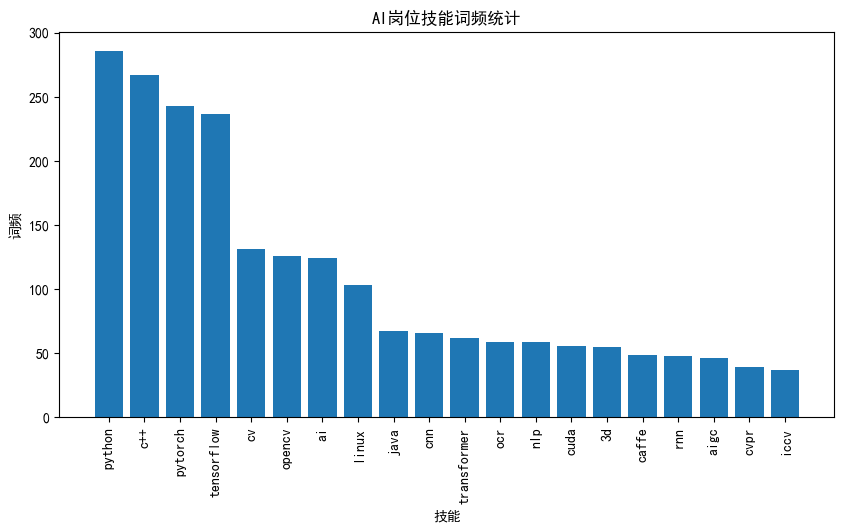

In [46]:
# 绘图
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(10, 5))
plt.bar(skill_count["技能"][:20], skill_count["词频"][:20])
plt.xticks(rotation=90)
plt.xlabel("技能")
plt.ylabel("词频")
plt.title("AI岗位技能词频统计") 

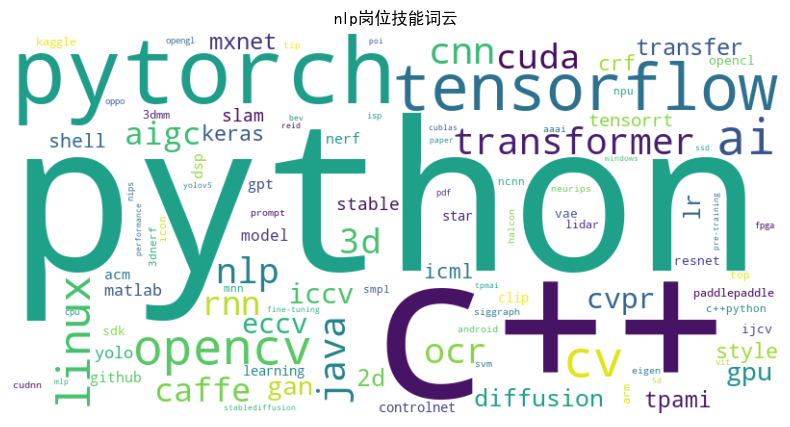

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the skill_count DataFrame to a dictionary
skill_count_dict = dict(zip(skill_count["技能"], skill_count["词频"]))

# Create a word cloud object with the specified font path
# 优化词云
wordcloud = WordCloud(
    width=800,                  # 词云宽度
    height=400,                 # 词云高度
    background_color='white',   # 背景颜色
    colormap='viridis',         # 颜色地图，可以根据需求选择
    max_words=100,               # 显示的最大词数
    contour_width=1,             # 词云轮廓线宽度
    contour_color='steelblue',   # 词云轮廓线颜色
    collocations=False).generate_from_frequencies(skill_count_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('nlp岗位技能词云')
plt.show()

In [32]:
from DataAnalyer import DataAnalyzer

da = DataAnalyzer(cv_data)
da.quant_salary()
sc2inx = da.quant_scale()
da.quant_work_exp()
da.quant_edu()

In [33]:
# 导入defultdict
from collections import defaultdict

def create_mapping(data, column_name, column_name2):
    mapping = defaultdict(list)
    for _, ll in data.iterrows():
        for j in ll[column_name]:
            mapping[j].append(ll[column_name2])
    return mapping


l2scale = create_mapping(cv_data, "技能", "企业规模")
l2salary = create_mapping(cv_data, "技能", "薪资")
l2edu = create_mapping(cv_data, "技能", "学历")
l2work_exp = create_mapping(cv_data, "技能", "工作年限")

def process_data(data, column_name, column_name2):
    df = pd.DataFrame(list(data.items()), columns=[column_name, column_name2])
    df[column_name2] = df[column_name2].apply(lambda x: [int(i) for i in x])
    df[column_name2+"_mean"] = df[column_name2].apply(lambda x: sum(x) / len(x))
    df["岗位数量"] = df[column_name2].apply(lambda x: len(x))
    df_flat = df.explode(column_name2)
    return df, df_flat

df1, df1_flat = process_data(l2scale, "技能", "企业规模")
df3, df3_flat = process_data(l2salary, "技能", "薪资")
# df5, df5_flat = process_data(l2edu, "技能", "学历")
# df6, df6_flat = process_data(l2work_exp, "技能", "工作年限")
dfl = pd.merge(df1, df3, on=["技能","岗位数量"])
# dfl = pd.merge(dfl, df5, on=["技能","岗位数量"])
# dfl = pd.merge(dfl, df6, on=["技能","岗位数量"])
dfl

,技能,企业规模,企业规模_mean,岗位数量,薪资,薪资_mean
0,nltk,"[13, 1, 9, 0, 1, 13, 1, 9, 13, 13]",7.300000,10,"[40, 13, 25, 24, 0, 40, 0, 16, 45, 40]",24.300000
1,python,"[13, 3, 8, 1, 1, 9, 0, 9, 13, 13, 1, 13, 3, 9,...",8.577735,521,"[40, 15, 13, 45, 13, 20, 20, 25, 40, 40, 3, 30...",25.642994
2,tensorflow,"[13, 0, 8, 1, 9, 13, 13, 9, 13, 5, 9, 13, 8, 5...",8.334416,308,"[40, 35, 13, 45, 20, 40, 30, 30, 40, 25, 40, 2...",27.087662
3,svm,"[13, 5, 13, 9, 13, 13, 7, 7, 7, 7, 5, 13, 8, 5...",9.222222,18,"[40, 10, 12, 12, 20, 40, 15, 20, 15, 17, 80, 1...",28.555556
4,pytorch,"[13, 0, 8, 1, 9, 13, 1, 13, 3, 9, 13, 5, 9, 5,...",7.586826,334,"[40, 35, 13, 45, 20, 40, 20, 30, 30, 30, 40, 2...",27.919162
...,...,...,...,...,...,...
739,•openai gpt 3,[6],6.000000,1,[28],28.000000
740,llamaindex,[6],6.000000,1,[28],28.000000
741,devsecops,[6],6.000000,1,[28],28.000000
742,llm api,[6],6.000000,1,[28],28.000000


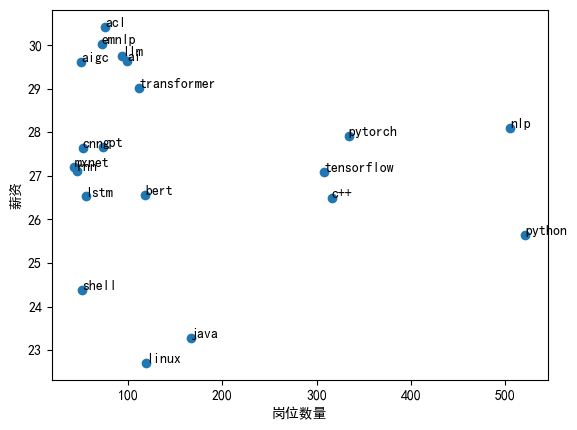

In [34]:
dfl = dfl[dfl["岗位数量"] >= 5]
dfl = dfl.sort_values(by="岗位数量", ascending=False)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(dfl["岗位数量"][:20], dfl["薪资_mean"][:20])
# 遍历DataFrame的每一行，添加文本
for i in range(20):
    plt.text(dfl["岗位数量"].iloc[i], dfl["薪资_mean"].iloc[i], dfl["技能"].iloc[i], fontsize=10)

plt.xlabel("岗位数量")
plt.ylabel("薪资")
plt.show()

In [35]:
dfl[:20]

,技能,企业规模,企业规模_mean,岗位数量,薪资,薪资_mean
1,python,"[13, 3, 8, 1, 1, 9, 0, 9, 13, 13, 1, 13, 3, 9,...",8.577735,521,"[40, 15, 13, 45, 13, 20, 20, 25, 40, 40, 3, 30...",25.642994
5,nlp,"[13, 9, 0, 8, 1, 1, 9, 9, 13, 13, 1, 13, 1, 13...",8.861386,505,"[40, 60, 35, 13, 45, 13, 20, 25, 40, 40, 20, 4...",28.095050
4,pytorch,"[13, 0, 8, 1, 9, 13, 1, 13, 3, 9, 13, 5, 9, 5,...",7.586826,334,"[40, 35, 13, 45, 20, 40, 20, 30, 30, 30, 40, 2...",27.919162
38,c++,"[9, 13, 13, 1, 13, 3, 9, 13, 13, 9, 9, 5, 13, ...",9.316456,316,"[20, 40, 40, 3, 30, 30, 30, 40, 5, 12, 40, 30,...",26.500000
2,tensorflow,"[13, 0, 8, 1, 9, 13, 13, 9, 13, 5, 9, 13, 8, 5...",8.334416,308,"[40, 35, 13, 45, 20, 40, 30, 30, 40, 25, 40, 2...",27.087662
16,java,"[3, 13, 1, 9, 13, 9, 5, 13, 5, 13, 8, 5, 13, 5...",8.688623,167,"[15, 40, 3, 30, 5, 40, 30, 30, 13, 17, 12, 30,...",23.287425
17,linux,"[3, 0, 1, 9, 13, 8, 5, 3, 3, 13, 5, 13, 13, 1,...",9.117647,119,"[15, 35, 45, 25, 16, 12, 20, 26, 12, 40, 10, 1...",22.714286
89,bert,"[5, 5, 5, 5, 13, 5, 5, 0, 3, 13, 13, 9, 3, 0, ...",7.974576,118,"[22, 30, 13, 30, 20, 20, 40, 30, 20, 20, 12, 1...",26.567797
65,transformer,"[3, 5, 9, 5, 5, 5, 1, 13, 5, 13, 5, 13, 0, 5, ...",7.285714,112,"[30, 30, 30, 22, 30, 13, 20, 30, 30, 20, 20, 6...",29.017857
28,ai,"[8, 13, 9, 5, 5, 5, 8, 13, 5, 5, 9, 5, 5, 8, 0...",7.656566,99,"[13, 40, 30, 22, 20, 15, 25, 80, 25, 16, 40, 4...",29.626263
